# Setup
Using data from [CSNMR-2982_whip_permutations](https://drive.google.com/drive/folders/1cWvEboCfpwcht5SAhj9iu9lox-VMRJ0f?usp=drive_link)

All 3 receivers were on the Westminster Building #2 roof, with microwave absorbing foam under them.

The Z3R was a Zepher 3 Rover antenna into a BX99x receiver.

The Klondike was a bare Klondike element into a BX99x receiver.

The P3ENCL was a Judo Prototype 3 enclosure, with 2x Klondike elements in it, but nothing else. The RF outputs of the Klondike elements were run to a BX992 receiver.

The results shown here are all for the primary antenna input to the BX receivers.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2 

import matplotlib.pyplot as plt
import pandas as pd
import viewdat_cno_lib as vdl

# Read Files

To create the csv files, the following commands were run, with the [gnss_diff](https://bitbucket.trimble.tools/projects/GNSSTL/repos/gnss-diff/browse) utility `proc_cno`


    proc_cno -F 240312_no_whips/data/gnss/KLONDIKE  -f KLONDIKE*.T04
    proc_cno -F 240312_no_whips/data/gnss/Z3R  -f BLDG2BD*.T04
    proc_cno -F 240312_no_whips/data/gnss/P3ENCL  -f P3ENCL*.T04


In [2]:
df_klondike = pd.read_csv('240312_no_whips/data/gnss/KLONDIKE/outputs/KLONDIKE_0.csv')
df_p3encl = pd.read_csv('240312_no_whips/data/gnss/P3ENCL/outputs/P3ENCL_0.csv')
df_z3r = pd.read_csv('240312_no_whips/data/gnss/Z3R/outputs/BLDG2BD_0.csv')

In [9]:
df_klondike['name'] = 'Klondike'
df_p3encl['name'] = 'P3_Enclosure'
df_z3r['name'] = 'Z3R'
print(df_klondike.shape, df_p3encl.shape, df_z3r.shape)
df = pd.concat([df_klondike, df_p3encl, df_z3r], axis=0)
print(df.shape)

(10485517, 24) (6159918, 24) (8563451, 24)
(25208886, 24)


# Plot Functions

In [106]:
def plot_time(df, names, SVType, Freq, SV, start, end, title, fname_settings):
    fig = plt.figure()
    for name in names:
        q = f'name == "{name}" and SVType == "{SVType}" and Freq == "{Freq}" and SV == {SV} and adj_time>{start} and adj_time<{end}'
        dfq = df.query(q)
        print(name, dfq.shape)
        #display(dfq)
        plt.plot(dfq.adj_time, dfq.CNo, linewidth=0.5)
    plt.legend(names)
    plt.xlabel('Time (GPS Seconds)')
    plt.ylabel('C/No')
    plt.grid(True)
    plt.title(title)
    
    fig.savefig(f'multipath_comparison_{fname_settings}.png')
    #fig.close()

In [102]:
def plot_time_az_el(df, names, SVType, Freq, SV, start, end, title, fname_settings):
    fig, ax = plt.subplots(
        3, 1, 
        figsize=(16,8), 
        layout="constrained"
    )
    for name in names:
        q = f'name == "{name}" and SVType == "{SVType}" and Freq == "{Freq}" and SV == {SV} and adj_time>{start} and adj_time<{end}'
        dfq = df.query(q)
        print(name, dfq.shape)
        #display(dfq)
        ax[0].plot(dfq.adj_time/1000, dfq.CNo, linewidth=0.25)
        ax[1].plot(dfq.Az, dfq.CNo, linewidth=0.5)
    
        if name == 'Z3R':
            marker = 'o'
            ms = 3
        elif name == 'Klondike':
            marker = 'x'
            ms = 2
        else:
            marker = '.'
            ms = 1.5
        ax[2].plot(dfq.El, dfq.CNo, marker, markersize=ms)
    
    #ax[0].set_ylim([15, 45])
    ax[0].set_title(title)
    ax[0].set_xlabel('Time (GPS Seconds x10^3)')
    ax[0].set_ylabel('C/No')
    ax[0].grid(True)
    
    ax[1].set_xlabel('Azimuth (Deg)')
    ax[1].set_ylabel('C/No')
    ax[1].grid(True)
    
    ax[2].set_xlabel('Elevation (Deg)')
    ax[2].set_ylabel('C/No')
    ax[2].grid(True)    
    ax[2].legend(names)
    
    #plt.tight_layout()
    fig.savefig(f'multipath_comparison_{fname_settings}_time_az_el.png')

In [105]:
def plot_el_range(df, names, SVType, Freq, SV, start, end, title, fname_settings):
    fig = plt.figure()
    for name in names:
        q = f'name == "{name}" and SVType == "{SVType}" and Freq == "{Freq}" and SV == {SV} and adj_time>{start} and adj_time<{end}'
        dfq = df.query(q)
    
        dfqg = dfq.groupby('El')
    
        dfqg = dfq.groupby(['El'])['CNo'].agg(
            [
            ('cno_range_el', lambda CNo: CNo.max() - CNo.min()), 
            #('cno_min', lambda CNo: CNo.min())
            ]
        ).reset_index()
        #display(dfqg)
        plt.plot(dfqg.El, dfqg.cno_range_el)
    
    plt.xlabel('Elevation (Deg)')
    plt.ylabel('C/No Range (dBHz)')
    plt.grid(True)    
    plt.legend(names)
    plt.title(title)
    
    fig.savefig(f'multipath_comparison_{fname_settings}_el_cno_range.png')

# proc_cno.py Plots

## GPS L1-CA
![!](240312_no_whips/data/gnss/KLONDIKE/results/KLONDIKE_0_d35_19-GPS-L1(CA)-adj_time.png)

![!](240312_no_whips/data/gnss/Z3R/results/BLDG2BD_0_d35_19-GPS-L1(CA)-adj_time.png)

![!](240312_no_whips/data/gnss/P3ENCL/results/P3ENCL_0_d35_19-GPS-L1(CA)-adj_time.png)

## GPS L2-E

![!](240312_no_whips/data/gnss/KLONDIKE/results/KLONDIKE_0_d35_19-GPS-L2(E)-adj_time.png)

![!](240312_no_whips/data/gnss/Z3R/results/BLDG2BD_0_d35_19-GPS-L2(E)-adj_time.png)

![!](240312_no_whips/data/gnss/P3ENCL/results/P3ENCL_0_d35_19-GPS-L2(E)-adj_time.png)

# Run Comparison Plots

Select the cell that you want settings for, and set it to 'Code', set all others to 'Raw', and then run all the plots.

Z3R (17277, 24)
Klondike (17270, 24)
P3_Enclosure (17274, 24)
Z3R (17277, 24)
Klondike (17270, 24)
P3_Enclosure (17274, 24)


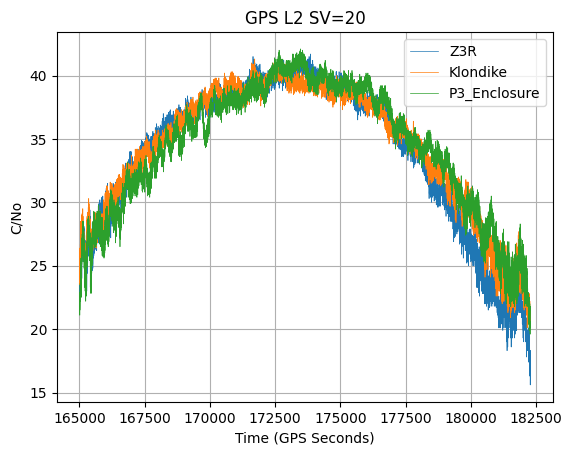

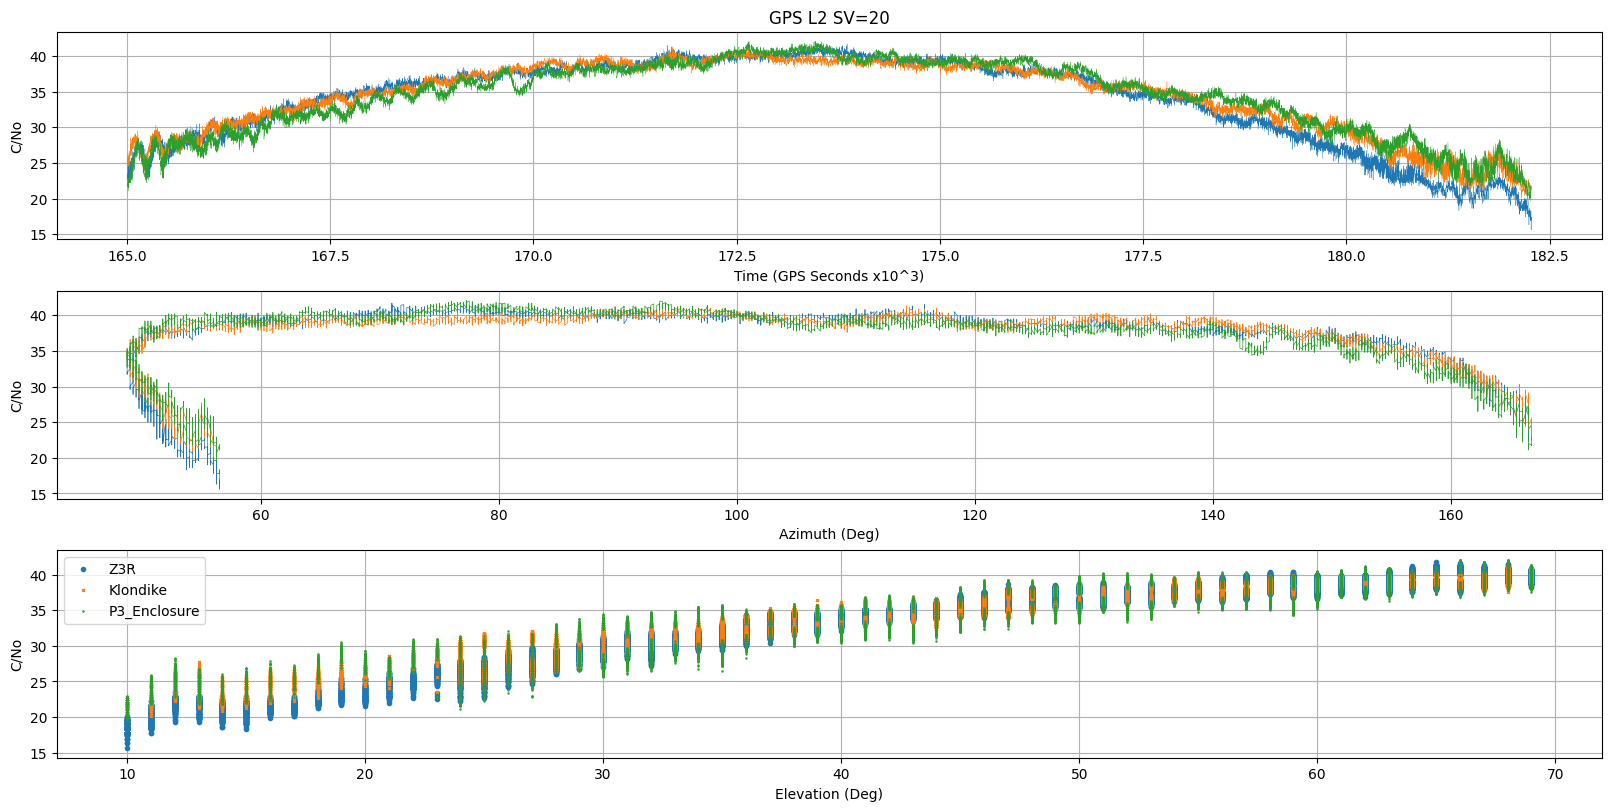

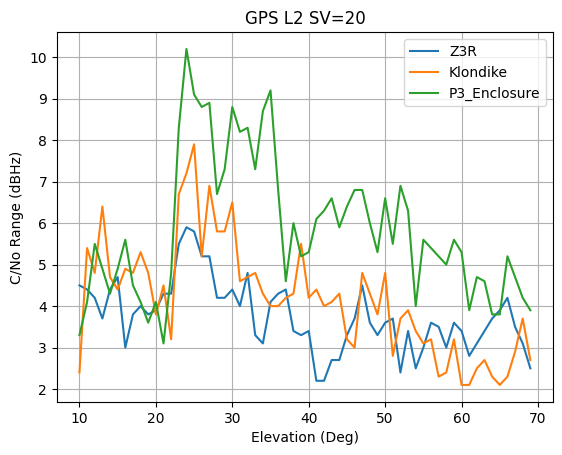

In [107]:
names =  ['Z3R', 'Klondike', 'P3_Enclosure']
SVType = "GPS"
Freq = "L2"
SV = 20
start = 165000
end = 185000
title = f'{SVType} {Freq} {SV=}'
fname_settings = f'{SVType}_{Freq}_{SV=}_{start}-{end}'

plot_time(df, names, SVType, Freq, SV, start, end, title, fname_settings)
plot_time_az_el(df, names, SVType, Freq, SV, start, end, title, fname_settings)
plot_el_range(df, names, SVType, Freq, SV, start, end, title, fname_settings)

Z3R (14973, 24)
Klondike (14969, 24)
P3_Enclosure (14969, 24)
Z3R (14973, 24)
Klondike (14969, 24)
P3_Enclosure (14969, 24)


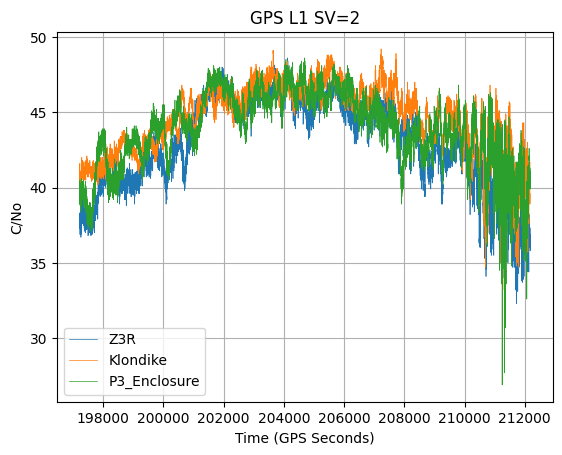

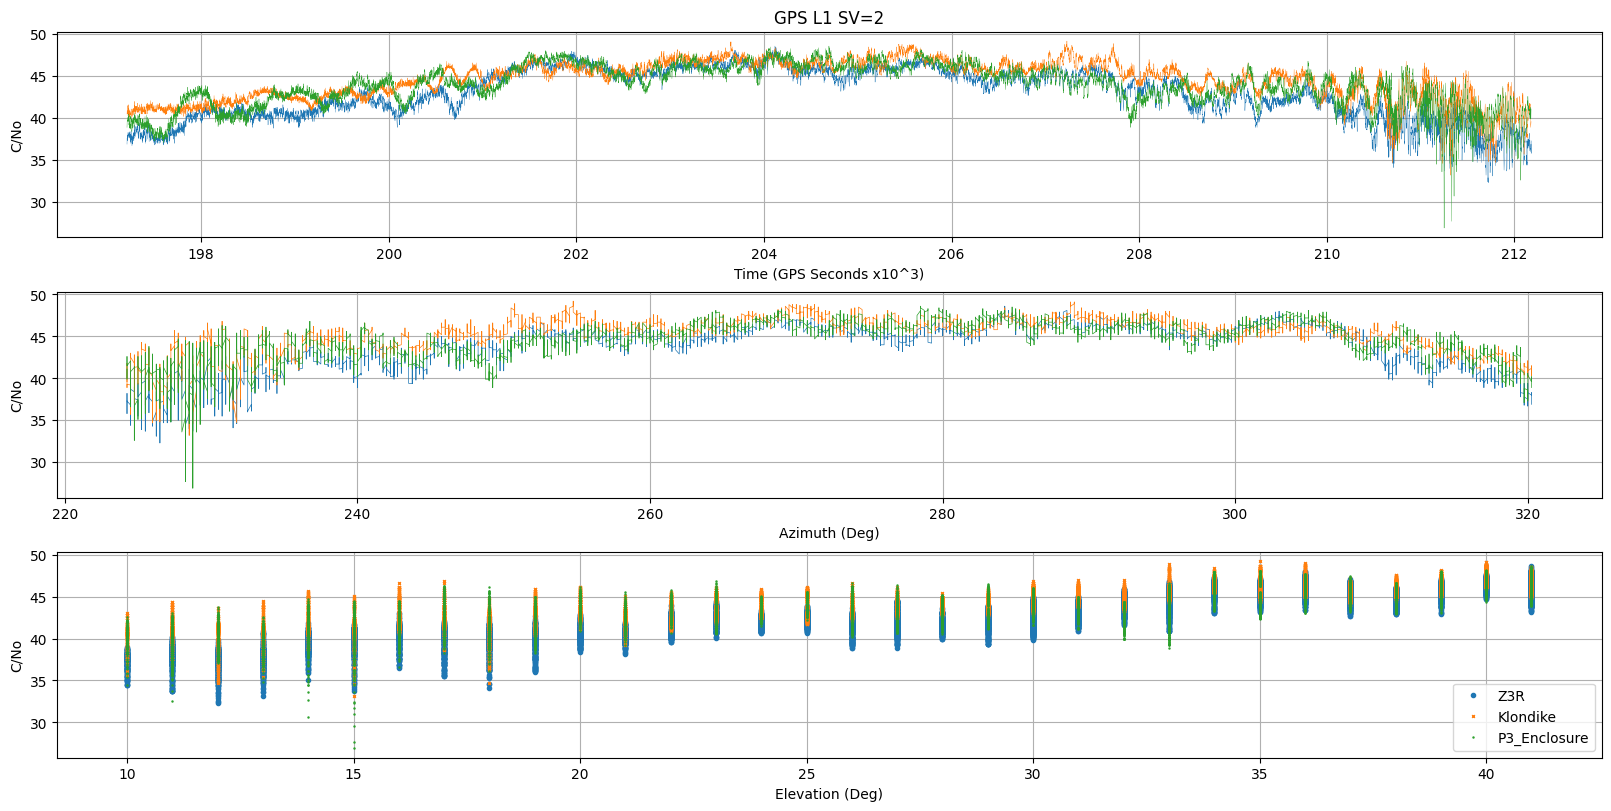

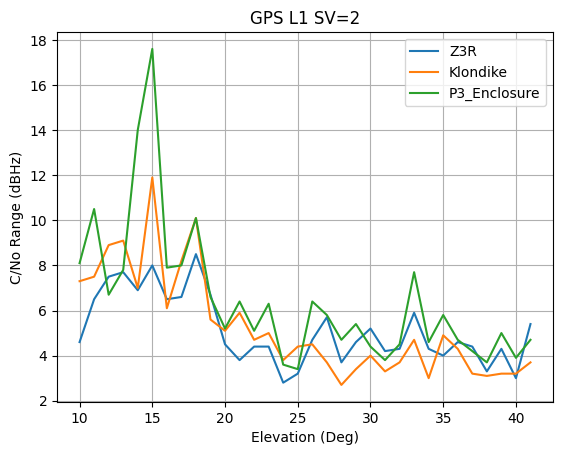

In [108]:
names =  ['Z3R', 'Klondike', 'P3_Enclosure']
SVType = "GPS"
Freq = "L1"
SV = 2
start = 195000
end = 215000
title = f'{SVType} {Freq} {SV=}'
fname_settings = f'{SVType}_{Freq}_{SV=}_{start}-{end}'

plot_time(df, names, SVType, Freq, SV, start, end, title, fname_settings)
plot_time_az_el(df, names, SVType, Freq, SV, start, end, title, fname_settings)
plot_el_range(df, names, SVType, Freq, SV, start, end, title, fname_settings)